<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(_3_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.6_n20.csv',
 'data_add_delta_-3.6_n30.csv',
 'data_add_delta_-3.6_n60.csv',
 'data_add_delta_-3.6_n120.csv',
 'data_add_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,38.304907,80.206126,97.418657,29.379753,0.000580,255.310023,255.309616,0.000407
1,0.0,1.0,88.547080,75.594256,49.975645,72.719826,-0.000232,296.836577,296.836848,-0.000272
2,0.0,2.0,34.406116,92.308001,59.914064,46.848790,-0.000095,243.476877,243.477013,-0.000136
3,0.0,3.0,99.759786,96.104414,70.932457,32.672341,0.000417,309.469415,309.468833,0.000583
4,0.0,4.0,56.065633,39.482448,70.475171,66.670896,0.000071,242.694220,242.694587,-0.000368
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,61.588590,47.353010,98.298874,44.488799,0.000735,261.730007,261.729839,0.000168
119996,999.0,116.0,23.926627,58.424546,90.078991,30.635010,0.000481,213.065656,213.065682,-0.000026
119997,999.0,117.0,21.445637,52.897114,75.189717,70.219180,0.000444,229.752092,229.751759,0.000333
119998,999.0,118.0,47.240683,43.388279,61.461558,96.277157,-0.001293,258.366384,258.367596,-0.001212


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,38.304907,80.206126,97.418657,29.379753,0.000580,255.310023,255.309616,0.000407
1,0.0,1.0,88.547080,75.594256,49.975645,72.719826,-0.000232,296.836577,296.836848,-0.000272
2,0.0,2.0,34.406116,92.308001,59.914064,46.848790,-0.000095,243.476877,243.477013,-0.000136
3,0.0,3.0,99.759786,96.104414,70.932457,32.672341,0.000417,309.469415,309.468833,0.000583
4,0.0,4.0,56.065633,39.482448,70.475171,66.670896,0.000071,242.694220,242.694587,-0.000368
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,61.588590,47.353010,98.298874,44.488799,0.000735,261.730007,261.729839,0.000168
119996,999.0,116.0,23.926627,58.424546,90.078991,30.635010,0.000481,213.065656,213.065682,-0.000026
119997,999.0,117.0,21.445637,52.897114,75.189717,70.219180,0.000444,229.752092,229.751759,0.000333
119998,999.0,118.0,47.240683,43.388279,61.461558,96.277157,-0.001293,258.366384,258.367596,-0.001212


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    38.304907  80.206126  97.418657  29.379753  0.000580  255.310023   
      1.0    88.547080  75.594256  49.975645  72.719826 -0.000232  296.836577   
      2.0    34.406116  92.308001  59.914064  46.848790 -0.000095  243.476877   
      3.0    99.759786  96.104414  70.932457  32.672341  0.000417  309.469415   
      4.0    56.065633  39.482448  70.475171  66.670896  0.000071  242.694220   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  61.588590  47.353010  98.298874  44.488799  0.000735  261.730007   
      116.0  23.926627  58.424546  90.078991  30.635010  0.000481  213.065656   
      117.0  21.445637  52.897114  75.189717  70.219180  0.000444  229.752092   
      118.0  47.240683  43.388279  61.461558  96.277157 -0.001293  258.366384   
      119.0  78.703978  23.114117  75.945374  43.067234  0.003291  230.833993   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    255.309616  0.000407  
      1.0    296.836848 -0.000272  
      2.0    243.477013 -0.000136  
      3.0    309.468833  0.000583  
      4.0    242.694587 -0.000368  
...                 ...       ...  
999.0 115.0  261.729839  0.000168  
      116.0  213.065682 -0.000026  
      117.0  229.751759  0.000333  
      118.0  258.367596 -0.001212  
      119.0  230.831400  0.002594  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    38.304907  80.206126  97.418657  29.379753  0.000580  255.310023   
      1.0    88.547080  75.594256  49.975645  72.719826 -0.000232  296.836577   
      2.0    34.406116  92.308001  59.914064  46.848790 -0.000095  243.476877   
      3.0    99.759786  96.104414  70.932457  32.672341  0.000417  309.469415   
      4.0    56.065633  39.482448  70.475171  66.670896  0.000071  242.694220   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  61.588590  47.353010  98.298874  44.488799  0.000735  261.730007   
      116.0  23.926627  58.424546  90.078991  30.635010  0.000481  213.065656   
      117.0  21.445637  52.897114  75.189717  70.219180  0.000444  229.752092   
      118.0  47.240683  43.388279  61.461558  96.277157 -0.001293  258.366384   
      119.0  78.703978  23.114117  75.945374  43.067234  0.003291  230.833993   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    255.309616  0.000407  
      1.0    296.836848 -0.000272  
      2.0    243.477013 -0.000136  
      3.0    309.468833  0.000583  
      4.0    242.694587 -0.000368  
...                 ...       ...  
999.0 115.0  261.729839  0.000168  
      116.0  213.065682 -0.000026  
      117.0  229.751759  0.000333  
      118.0  258.367596 -0.001212  
      119.0  230.831400  0.002594  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,38.304907,80.206126,97.418657,29.379753,0.000580,255.310023,255.309616,0.000407
1,0.0,1.0,88.547080,75.594256,49.975645,72.719826,-0.000232,296.836577,296.836848,-0.000272
2,0.0,2.0,34.406116,92.308001,59.914064,46.848790,-0.000095,243.476877,243.477013,-0.000136
3,0.0,3.0,99.759786,96.104414,70.932457,32.672341,0.000417,309.469415,309.468833,0.000583
4,0.0,4.0,56.065633,39.482448,70.475171,66.670896,0.000071,242.694220,242.694587,-0.000368
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,61.588590,47.353010,98.298874,44.488799,0.000735,261.730007,261.729839,0.000168
119996,999.0,116.0,23.926627,58.424546,90.078991,30.635010,0.000481,213.065656,213.065682,-0.000026
119997,999.0,117.0,21.445637,52.897114,75.189717,70.219180,0.000444,229.752092,229.751759,0.000333
119998,999.0,118.0,47.240683,43.388279,61.461558,96.277157,-0.001293,258.366384,258.367596,-0.001212


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    38.304907  80.206126  97.418657  29.379753  0.000580  255.310023   
      1.0    88.547080  75.594256  49.975645  72.719826 -0.000232  296.836577   
      2.0    34.406116  92.308001  59.914064  46.848790 -0.000095  243.476877   
      3.0    99.759786  96.104414  70.932457  32.672341  0.000417  309.469415   
      4.0    56.065633  39.482448  70.475171  66.670896  0.000071  242.694220   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  61.588590  47.353010  98.298874  44.488799  0.000735  261.730007   
      116.0  23.926627  58.424546  90.078991  30.635010  0.000481  213.065656   
      117.0  21.445637  52.897114  75.189717  70.219180  0.000444  229.752092   
      118.0  47.240683  43.388279  61.461558  96.277157 -0.001293  258.366384   
      119.0  78.703978  23.114117  75.945374  43.067234  0.003291  230.833993   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    255.309616  0.000407  
      1.0    296.836848 -0.000272  
      2.0    243.477013 -0.000136  
      3.0    309.468833  0.000583  
      4.0    242.694587 -0.000368  
...                 ...       ...  
999.0 115.0  261.729839  0.000168  
      116.0  213.065682 -0.000026  
      117.0  229.751759  0.000333  
      118.0  258.367596 -0.001212  
      119.0  230.831400  0.002594  

[120000 rows x 8 columns]

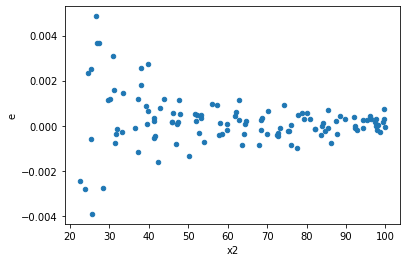

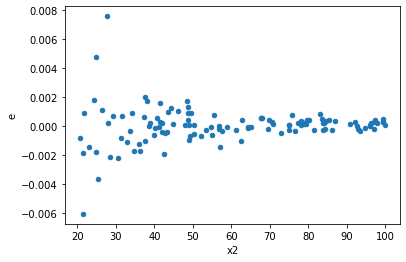

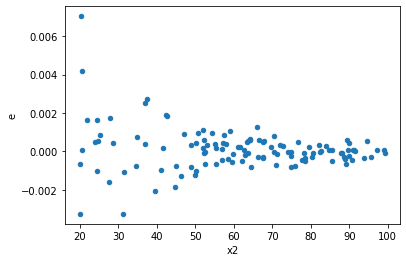

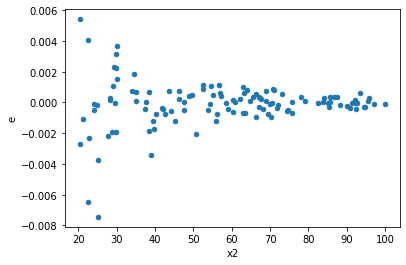

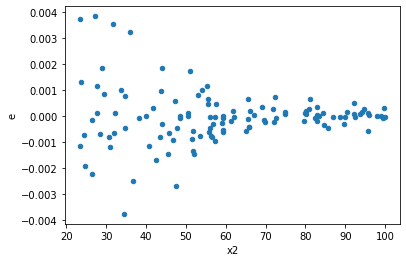

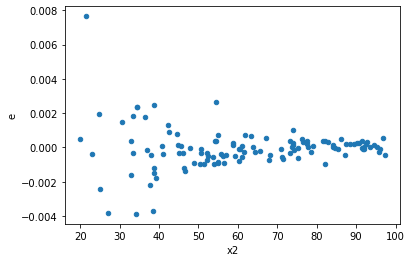

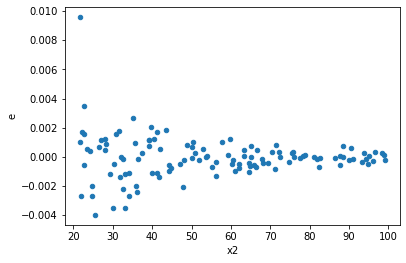

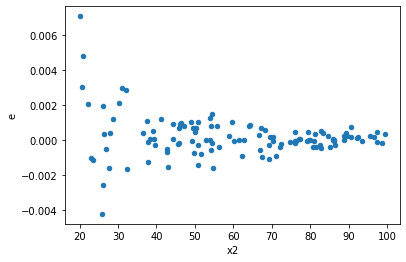

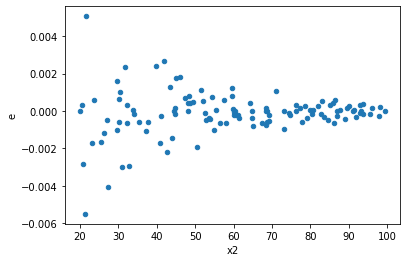

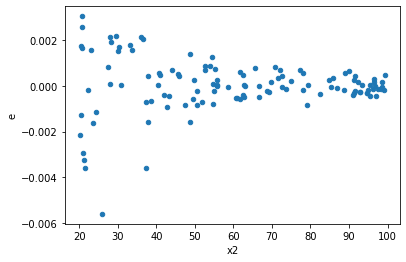

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,44.0,44.0,6.518395716117588e-05,9.400807285053664e-05,1.4814535718449064e-06,2.136547110239469e-06,1.4421964689576816,0.22850040508249037,0.8857497974587548,0.11425020254124518,Reject001=1 : Homoscedasticity
17.0,44.0,44.0,6.686457454553799e-05,7.440514956417482e-05,1.5196494214894998e-06,1.6910261264585187e-06,1.112773842799244,0.724605992476377,0.6376970037618115,0.3623029962381885,Reject001=1 : Homoscedasticity
32.0,44.0,44.0,4.6009177790114526e-05,5.248789510146135e-05,1.045663131593512e-06,1.1929067068513943e-06,1.1408135859523845,0.6640660050528897,0.6679669974735551,0.33203300252644485,Reject001=1 : Homoscedasticity
69.0,44.0,44.0,8.78028360243872e-05,9.55369744366799e-05,1.9955190005542544e-06,2.1712948735609067e-06,1.0880852915746884,0.7807355159171077,0.6096322420414462,0.39036775795855383,Reject001=1 : Homoscedasticity
74.0,44.0,44.0,7.105318522547329e-05,8.0183098387621e-05,1.6148451187607567e-06,1.8223431451732045e-06,1.12849407290012,0.6902357334738989,0.6548821332630506,0.34511786673694944,Reject001=1 : Homoscedasticity
140.0,44.0,44.0,7.60691149574207e-05,9.27861721726153e-05,1.7288435217595614e-06,2.1087766402867113e-06,1.2197614264942072,0.5127265556522347,0.7436367221738827,0.25636327782611734,Reject001=1 : Homoscedasticity
150.0,44.0,44.0,8.554366615877822e-05,8.96577802496077e-05,1.9441742308813232e-06,2.0376768238547205e-06,1.0480937312552543,0.8768984125640187,0.5615507937179907,0.43844920628200934,Reject001=1 : Homoscedasticity
170.0,44.0,44.0,8.859599699033986e-05,0.00011004735905518814,2.0135453861440875e-06,2.501076342163367e-06,1.2421256353962276,0.4750071864530856,0.7624964067734572,0.2375035932265428,Reject001=1 : Homoscedasticity
208.0,44.0,44.0,6.055025313408559e-05,8.071288820450084e-05,1.3761421166837633e-06,1.8343838228295645e-06,1.3329901037038785,0.34401367667347804,0.827993161663261,0.17200683833673902,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,7.765398216604471e-05,3.7560603950601294e-05,1.7648632310464707e-06,8.536500897863931e-07,0.48369192284674867,0.01779686413260317,Reject001=1 : Homoscedasticity
1.0,44.0,44.0,0.00013260155685027047,3.465588037583712e-05,3.013671746597056e-06,7.87633644905389e-07,0.26135349538142644,1.910294862882146e-05,Reject001=0 : Heteroscedasticity
2.0,44.0,44.0,0.00010520342726171161,1.3654205923976008e-05,2.3909869832207185e-06,3.1032286190854564e-07,0.1297886036546017,3.8860561741714487e-10,Reject001=0 : Heteroscedasticity
3.0,44.0,44.0,6.518395716117588e-05,9.400807285053664e-05,1.4814535718449064e-06,2.136547110239469e-06,1.4421964689576816,0.22850040508249037,Reject001=1 : Homoscedasticity
4.0,44.0,44.0,0.00010369176170901641,1.5387595813227535e-05,2.3566309479321913e-06,3.4971808666426217e-07,0.1483974769028302,3.739574686801831e-09,Reject001=0 : Heteroscedasticity
5.0,44.0,44.0,5.901323141448458e-05,2.8389911850725822e-05,1.3412098048746496e-06,6.452252693346778e-07,0.48107705967373315,0.016980404017695485,Reject001=1 : Homoscedasticity
6.0,44.0,44.0,0.0001772716899036705,1.8436057003338652e-05,4.028902043265239e-06,4.190012955304239e-07,0.1039988788585296,7.815727936833993e-12,Reject001=0 : Heteroscedasticity
7.0,44.0,44.0,7.979644234754112e-05,1.2880848967179782e-05,1.8135555078986617e-06,2.9274656743590413e-07,0.16142134396266977,1.4852897480335484e-08,Reject001=0 : Heteroscedasticity
8.0,44.0,44.0,9.457989839374174e-05,3.0284595756771213e-05,2.149543145312312e-06,6.882862671993458e-07,0.32020118726174396,0.00025078052301976496,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    798
Reject001=1 : Homoscedasticity      202
Name: Result_test, dtype: int64